Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
New Distribution Type: Right Skewed Distribution
New Skewness: 0.6234504393062967
New Kurtosis: 5.0579648895525535


KeyError: 'E_1_normalized_transformed'

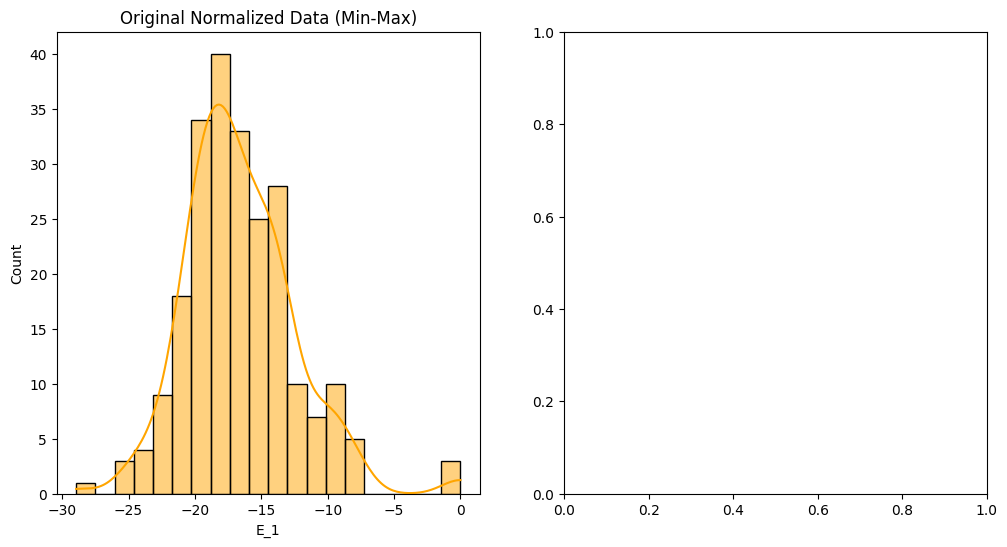

In [ ]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
n_samples = len(data)
# Initialize the QuantileTransformer with a normal distribution output
quantile_transformer = QuantileTransformer(n_quantiles=n_samples, output_distribution='normal', random_state=42)

# Apply the transformation to the normalized data
data_transformed = quantile_transformer.fit_transform(data.values.reshape(-1, 1))   

# Convert the transformed data back into a DataFrame for visualization
data_transformed_df = pd.DataFrame(data_transformed, columns=['E_1_transformed'])

# Check the new skewness and kurtosis statistics
new_skewness = data_transformed_df['E_1_transformed'].skew()
new_kurtosis = data_transformed_df['E_1_transformed'].kurtosis()
# Determine the type of distribution based on skewness and kurtosis
if abs(new_skewness) < 0.5 and abs(new_kurtosis - 3) < 1:
    new_distribution_type = 'Normal Distribution'
elif new_skewness > 0:
    new_distribution_type = 'Right Skewed Distribution'
elif new_skewness < 0:
    new_distribution_type = 'Left Skewed Distribution'
elif abs(new_kurtosis - 3) > 1:
    new_distribution_type = 'Leptokurtic Distribution (Heavy Tails)'
else:
    new_distribution_type = 'Platykurtic Distribution (Light Tails)'

print(f"New Distribution Type: {new_distribution_type}")

print(f"New Skewness: {new_skewness}")
print(f"New Kurtosis: {new_kurtosis}")

# Plot the original normalized data and the transformed (normally distributed) data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot original normalized data
plt.subplot(1, 2, 1)
sns.histplot(data['E_1'], kde=True, color='orange', bins=20)
plt.title('Original Normalized Data (Min-Max)')

# Plot transformed data to normal distribution
plt.subplot(1, 2, 2)
sns.histplot(data_transformed_df['E_1_transformed'], kde=True, color='green', bins=20)
plt.title('Transformed Data (Normal Distribution)')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
scaler = MinMaxScaler()

# Apply Min-Max normalization to the transformed data
data_normalized = scaler.fit_transform(data[['E_1']])

# Convert the result back into a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=['E_1_normalized'])
data_normalized.to_csv('normalized_data.csv', index=False)

# Plot the original and normalized data
plt.figure(figsize=(12, 6))
# Plot original data
plt.subplot(1, 2, 1)
sns.histplot(data_normalized['E_1_normalized'], kde=True, color='orange', bins=20)
plt.title('Data (original E)')

# Plot normalized data
plt.subplot(1, 2, 2)
sns.histplot(data_normalized['E_1_normalized'], kde=True, color='green', bins=20)
plt.title('Normalized Data (Min-Max)')

plt.tight_layout()
plt.show()
# Print statistics to compare the before and after transformation
print("Original Data Statistics:")
print(f"Skewness: {data['E_1'].skew()}")
print(f"Kurtosis: {data['E_1'].kurtosis()}")

print("\nTransformed Data Statistics:")
print(f"Skewness: {data_normalized['E_1_normalized'].skew()}")
print(f"Kurtosis: {data_normalized['E_1_normalized'].kurtosis()}")